## Products Analysis and Segmentation

In [13]:
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mp

In [14]:
diamonds = pd.read_csv('diamonds.csv')

Q1 - What is the highest diamond price?

In [15]:
diamonds['price'].max()

18823

Q2 - What is the average diamond price?

In [16]:
diamonds['price'].mean()

3932.799721913237

Q3 - How many diamonds with "Ideal" cut are there?

In [17]:
diamonds['cut'].value_counts()['Ideal']

21551

Q4 - How many different colors do diamonds have and what are they?

In [18]:
color_count = diamonds['color'].nunique()
color_values = diamonds['color'].unique()
print("There are",color_count,"different diamond colors which are:",color_values )

There are 7 different diamond colors which are: ['E' 'I' 'J' 'H' 'F' 'G' 'D']


Q5 - What is the median carat of premium type diamonds?

In [19]:
premium = diamonds.loc[diamonds["cut"] == "Premium"]
premium['carat'].median()

0.86

Q6 - Create an average carat for each type of cut

In [20]:
diamonds.groupby('cut').mean('carat')['carat']

cut
Fair         1.046137
Good         0.849185
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Name: carat, dtype: float64

Q7 - Create a price average for each color type.

In [21]:
diamonds.groupby('color').mean('price')['price']

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

Extra - add 3 visualizations

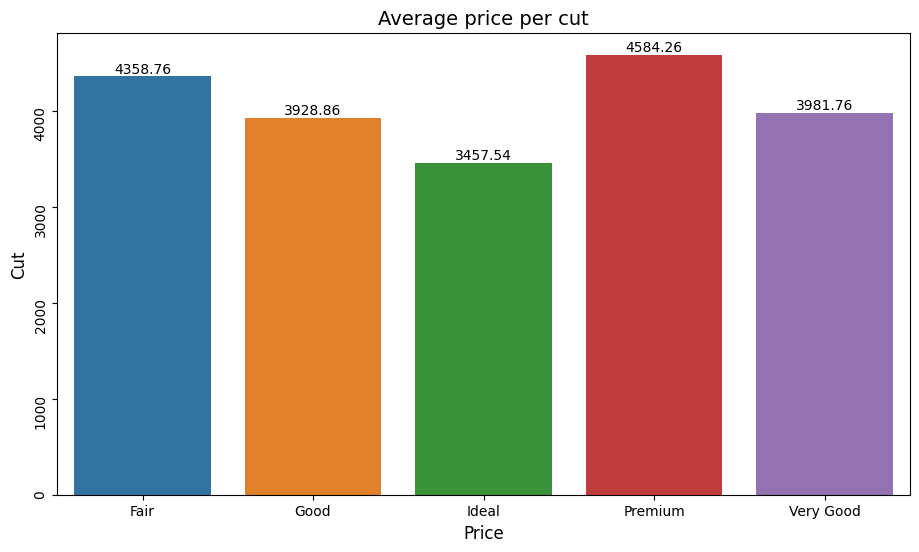

In [22]:
df = diamonds.groupby('cut')['price'].mean('price').reset_index().round(2)
plt.figure(figsize=(11,6))
ax = sb.barplot(data=df, x='cut', y='price')
ax.bar_label(ax.containers[0])
plt.title('Average price per cut', fontdict={'fontsize':14})
plt.xlabel('Price', fontdict={'fontsize':12})
plt.ylabel('Cut', fontdict={'fontsize':12})
plt.yticks(rotation=90)
plt.show()

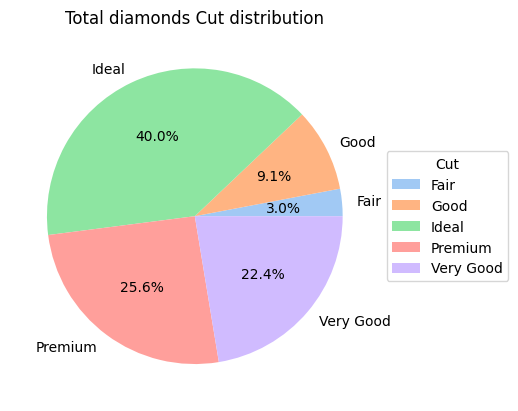

In [23]:
df2 = diamonds.groupby('cut')['price'].count().reset_index()
df2 = df2.set_index('cut')
pcolor = sb.color_palette("pastel", 10)
df2.plot.pie(y='price', autopct='%1.1f%%', colors=pcolor)
plt.title('Total diamonds Cut distribution')
plt.legend(title='Cut', loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('')
plt.show()

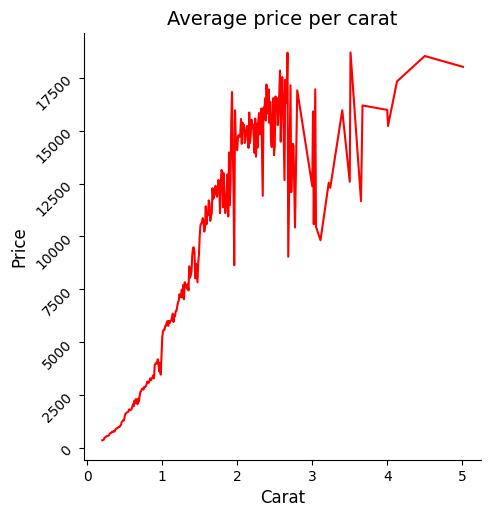

In [24]:
df3 = diamonds.groupby('carat')['price'].mean('price').reset_index().round(2)
sb.relplot(data=df3, kind="line", x="carat", y="price", color='Red')
plt.title('Average price per carat', fontdict={'fontsize':14})
plt.xlabel('Carat', fontdict={'fontsize':12})
plt.ylabel('Price', fontdict={'fontsize':12})
plt.yticks(rotation=45)
plt.show()